In [ ]:
# Name: nataraj kumaran
# Register Number: 212223230137

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## Step 1: Load and Preprocess Data

In [ ]:
## Step 1: Load and Preprocess Data
# Define transformations for images
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

In [ ]:
# Load Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

In [ ]:
# Get the shape of the first image in the training dataset
image, label = train_dataset[0]
print(image.shape)
print(len(train_dataset))

torch.Size([1, 28, 28])
60000


In [ ]:
# Get the shape of the first image in the test dataset
image, label = test_dataset[0]
print(image.shape)
print(len(test_dataset))

torch.Size([1, 28, 28])
10000


In [ ]:
# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Step 2: Define the CNN Model

In [ ]:
class CNNClassifier(nn.Module):
  def __init__(self):
    super(CNNClassifier, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(128 * 3 * 3, 128) # Adjusted input features for fc1
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = self.pool(torch.relu(self.conv3(x)))
    x = x.view(x.size(0), -1) # Flatten the image
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

## Step 3: Initialize Model, Loss Function, and Optimizer

In [ ]:
from torchsummary import summary

model = CNNClassifier()

if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

print('Name: NATARAJ KUMARAN S')
print('Register Number: 21222323230137')
summary(model, input_size=(1, 28, 28))

Name: NATARAJ KUMARAN S
Register Number: 21222323230137
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
         MaxPool2d-6            [-1, 128, 3, 3]               0
            Linear-7                  [-1, 128]         147,584
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 249,162
Trainable params: 249,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.42
Params size (MB): 0.95
Estimated Total Siz

## Step 4: Train the Model

In [ ]:
# Initialize the Model, Loss Function, and Optimizer
model =CNNClassifier()
criterion =nn.CrossEntropyLoss()
optimizer =optim.Adam(model.parameters(),lr=0.001)

## Step 5: Evaluate the Model

In [ ]:
# Train the Model
def train_model(model, train_loader, num_epochs=3):
  for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print('Name: Nataraj')
        print('Register Number: 212223230137')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


In [ ]:
train_model(model, train_loader)

Name: Nataraj
Register Number: 212223230137
Epoch [1/1], Loss: 0.4678


In [ ]:
import matplotlib.pyplot as plt
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    with torch.no_grad():
        output = model(image.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(output, 1)
    class_names = dataset.classes

    # Display the image
    print('Name: NATARAJ')
    print('Register Number: 212223230137')
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')

Name: NATARAJ
Register Number: 212223230137


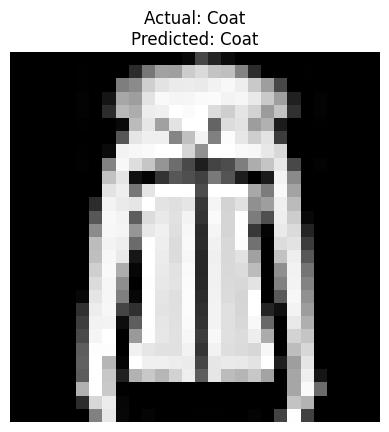

Actual: Coat, Predicted: Coat


In [ ]:
predict_image(model, image_index=6500, dataset=test_dataset)


100%|██████████| 26.4M/26.4M [00:01<00:00, 14.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.93MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 26.0MB/s]


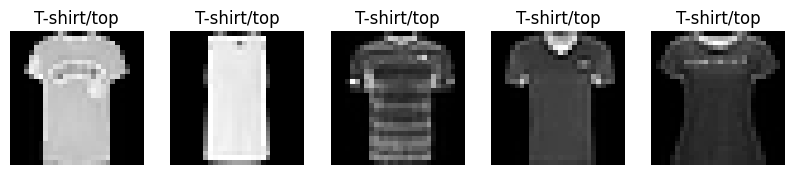

In [4]:
import matplotlib.pyplot as plt
import torchvision

# Load Fashion-MNIST again (test dataset)
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

test_dataset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, transform=transform, download=True
)

# Fashion-MNIST class names
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Function to display specific class images
def show_specific_class(dataset, target_class="T-shirt/top", num_images=5):
    indices = [i for i, (_, label) in enumerate(dataset) if classes[label] == target_class]
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        image, label = dataset[indices[i]]
        plt.subplot(1, num_images, i+1)
        plt.imshow(image.squeeze(), cmap="gray")
        plt.title(classes[label])
        plt.axis("off")
    plt.show()

# Example: show only T-shirt images
show_specific_class(test_dataset, target_class="T-shirt/top", num_images=5)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


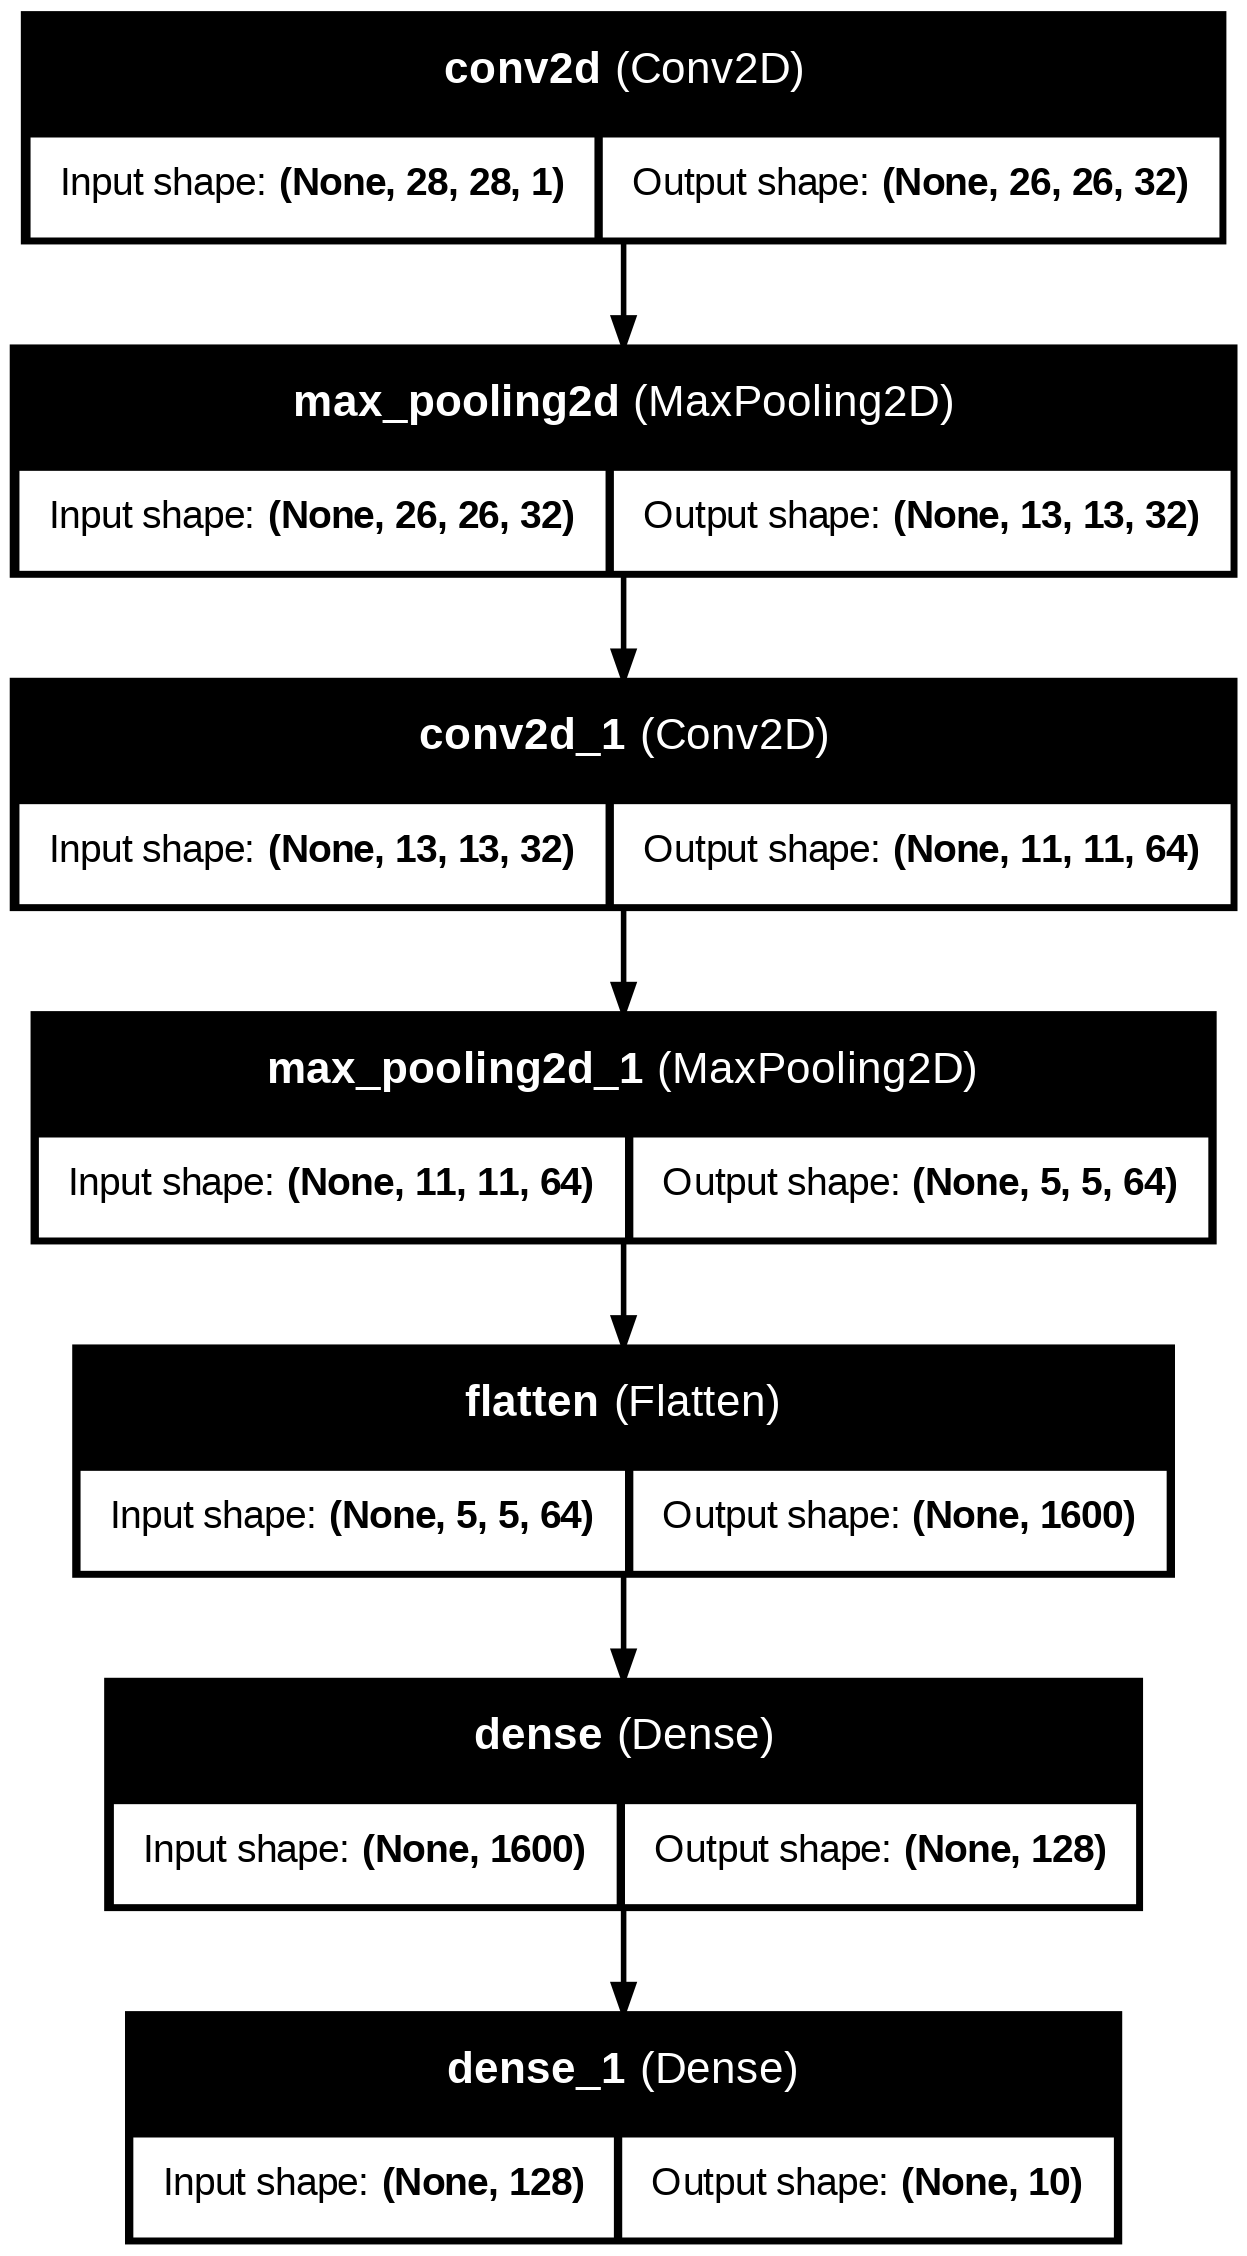

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Example CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Generate model visualization
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
